The impact of covid-19 on NYC rental market
In this project I will be exploring the inventory and median prices data from StreetEasy to understand the impact of covid-19 had on the nyc rental market. The data I have was downloaded from the streeteasy's website. The inventory data ranges from 01/2010 to 07/2020. The median price data ranges from 01/2007 to 07/2020. Objective of this project is to create a 2020 forecast using Facebook's Prophet model, which is a time series model that accounts for seasonal changes in the data to create a more accurate prediction and then compare it to the actual 2020 data. For this project I will be mainly focusing on the borough of Manhattan and I will also be exploring the impact on each submarket in Manhattan.     

In [41]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from fbprophet import Prophet
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [42]:
df = pd.read_csv('rentalInventory_All.csv')

In [43]:
melt_df = df.melt(id_vars=["areaName", "Borough", "areaType"], 
        var_name="date", 
        value_name="amount")

In [44]:
melt_df

,areaName,Borough,areaType,date,amount
0,All Downtown,Manhattan,submarket,2010-01,4268
1,All Midtown,Manhattan,submarket,2010-01,3065
2,All Upper East Side,Manhattan,submarket,2010-01,2550
3,All Upper Manhattan,Manhattan,submarket,2010-01,848
4,All Upper West Side,Manhattan,submarket,2010-01,2164
...,...,...,...,...,...
25141,Windsor Terrace,Brooklyn,neighborhood,2020-07,134
25142,Woodhaven,Queens,neighborhood,2020-07,21
25143,Woodlawn,Bronx,neighborhood,2020-07,3
25144,Woodside,Queens,neighborhood,2020-07,131


In [45]:
Manhattan_df = melt_df[melt_df.Borough == 'Manhattan']

In [46]:
Manhattan_df

,areaName,Borough,areaType,date,amount
0,All Downtown,Manhattan,submarket,2010-01,4268
1,All Midtown,Manhattan,submarket,2010-01,3065
2,All Upper East Side,Manhattan,submarket,2010-01,2550
3,All Upper Manhattan,Manhattan,submarket,2010-01,848
4,All Upper West Side,Manhattan,submarket,2010-01,2164
...,...,...,...,...,...
25129,Upper East Side,Manhattan,neighborhood,2020-07,5255
25130,Upper West Side,Manhattan,neighborhood,2020-07,5097
25134,Washington Heights,Manhattan,neighborhood,2020-07,929
25135,West Harlem,Manhattan,neighborhood,2020-07,154


In [47]:
#Create df for Boro, then each submarket

In [48]:
Boro = Manhattan_df[Manhattan_df.areaType == 'borough']

In [49]:
df_downtown = Manhattan_df[Manhattan_df.areaName == 'All Downtown']

In [50]:
df_east_side = Manhattan_df[Manhattan_df.areaName == 'All Upper East Side']

In [51]:
df_upper = Manhattan_df[Manhattan_df.areaName == 'All Upper Manhattan']

In [52]:
df_midtown = Manhattan_df[Manhattan_df.areaName == 'All Midtown']

In [53]:
df_west_side = Manhattan_df[Manhattan_df.areaName == 'All Upper West Side']

# The forecasting what 2020 inventory should have looked like for the whole borough  of Manhattan.

In [55]:
Boro2 = Boro.rename(columns={"date": "ds", "amount": "y"})
Boro3= Boro2[['ds','y']]
Boro3['ds'] = Boro3['ds'].astype('datetime64')
Boro4 = Boro3[:120]


C:\Users\doube\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
m = Prophet()
m.fit(Boro4)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future = m.make_future_dataframe(periods=7, freq='MS')
future.tail()

,ds
122,2020-03-01
123,2020-04-01
124,2020-05-01
125,2020-06-01
126,2020-07-01


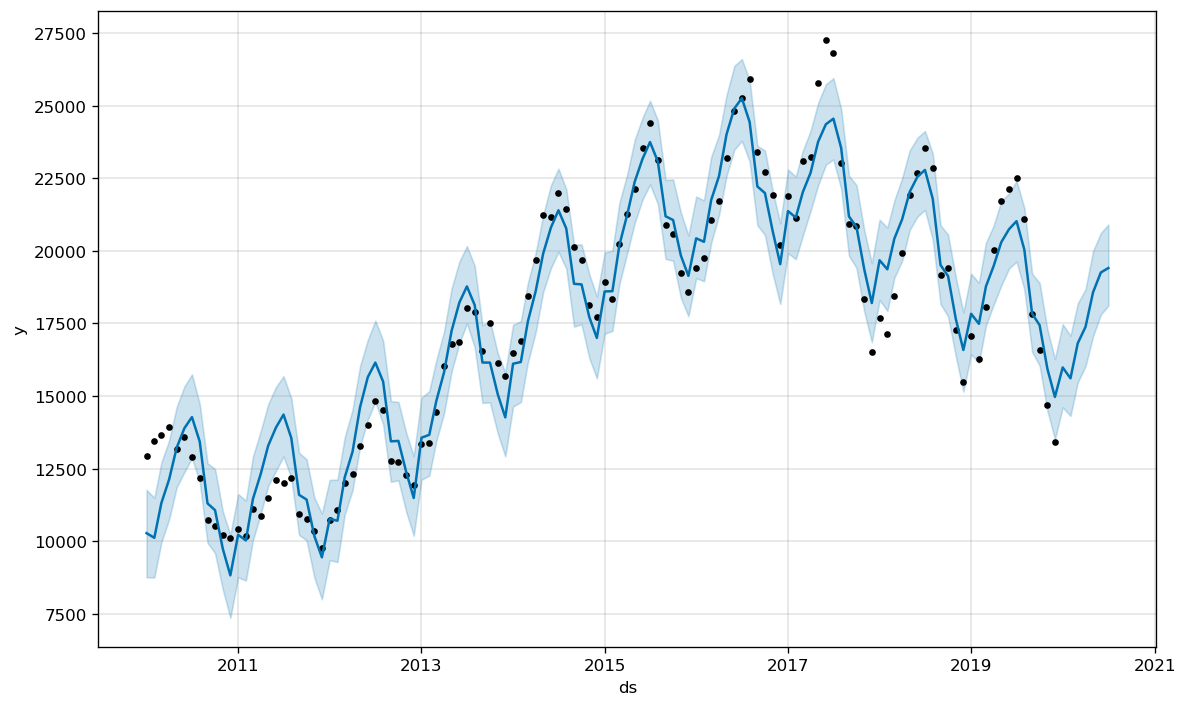

In [58]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

Here I merged the forcasted data with the real data, then I removed all columns that won't be used and ploted them. 

In [59]:
Final_boro = pd.merge(Boro3, forecast, on='ds', how='inner')

In [60]:
Final_boro

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,12925,11491.138925,8762.142776,11773.371807,11491.138925,11491.138925,-1208.523440,-1208.523440,-1208.523440,-1208.523440,-1208.523440,-1208.523440,0.0,0.0,0.0,10282.615485
1,2010-02-01,13461,11496.420280,8756.653195,11498.782079,11496.420280,11496.420280,-1374.473398,-1374.473398,-1374.473398,-1374.473398,-1374.473398,-1374.473398,0.0,0.0,0.0,10121.946883
2,2010-03-01,13650,11501.190537,9970.375326,12715.262231,11501.190537,11501.190537,-185.425878,-185.425878,-185.425878,-185.425878,-185.425878,-185.425878,0.0,0.0,0.0,11315.764658
3,2010-04-01,13933,11506.471892,10760.482641,13470.156071,11506.471892,11506.471892,626.376503,626.376503,626.376503,626.376503,626.376503,626.376503,0.0,0.0,0.0,12132.848394
4,2010-05-01,13191,11511.582881,11856.602320,14622.501227,11511.582881,11511.582881,1708.267702,1708.267702,1708.267702,1708.267702,1708.267702,1708.267702,0.0,0.0,0.0,13219.850582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020-03-01,12426,17150.425304,15472.596097,18186.110992,17125.171465,17173.484975,-332.786973,-332.786973,-332.786973,-332.786973,-332.786973,-332.786973,0.0,0.0,0.0,16817.638332
123,2020-04-01,12395,17003.910264,16033.756148,18676.018046,16954.100321,17049.654897,378.905643,378.905643,378.905643,378.905643,378.905643,378.905643,0.0,0.0,0.0,17382.815906
124,2020-05-01,20029,16862.121514,17059.101669,19989.988251,16772.725614,16931.004351,1710.668893,1710.668893,1710.668893,1710.668893,1710.668893,1710.668893,0.0,0.0,0.0,18572.790407
125,2020-06-01,28572,16715.606474,17806.108122,20612.669379,16593.457987,16815.432430,2538.029341,2538.029341,2538.029341,2538.029341,2538.029341,2538.029341,0.0,0.0,0.0,19253.635815


In [61]:
Final_boro = Final_boro.drop(['trend', 'yhat_lower','yhat_upper','trend_lower','trend_upper','additive_terms','additive_terms_lower','additive_terms_upper', 'yearly','yearly_lower','multiplicative_terms','yearly_upper','multiplicative_terms_lower','multiplicative_terms_upper'], axis=1)

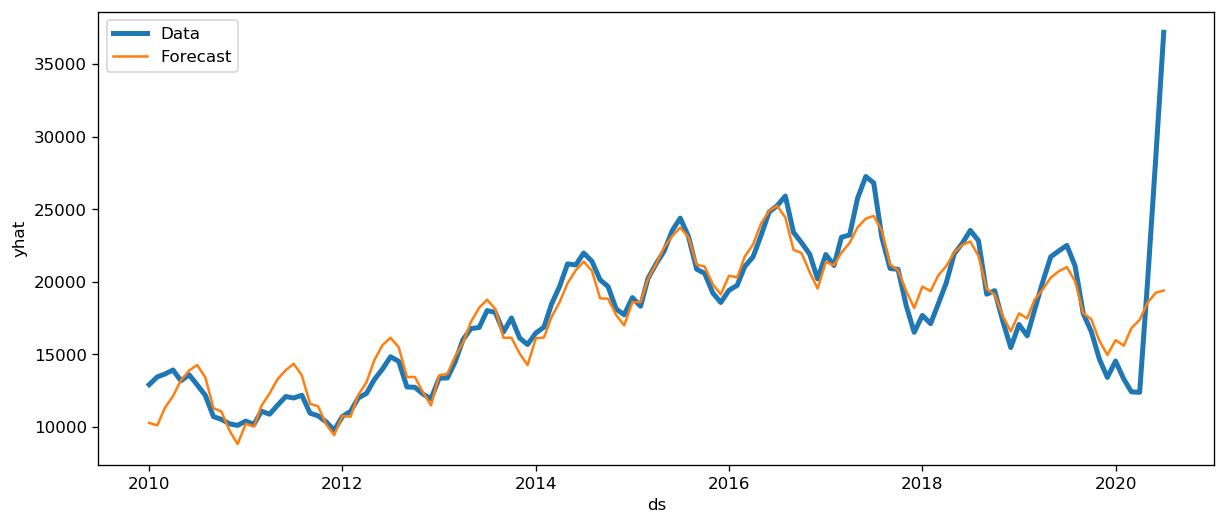

In [62]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_boro, label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_boro ,label ='Forecast')

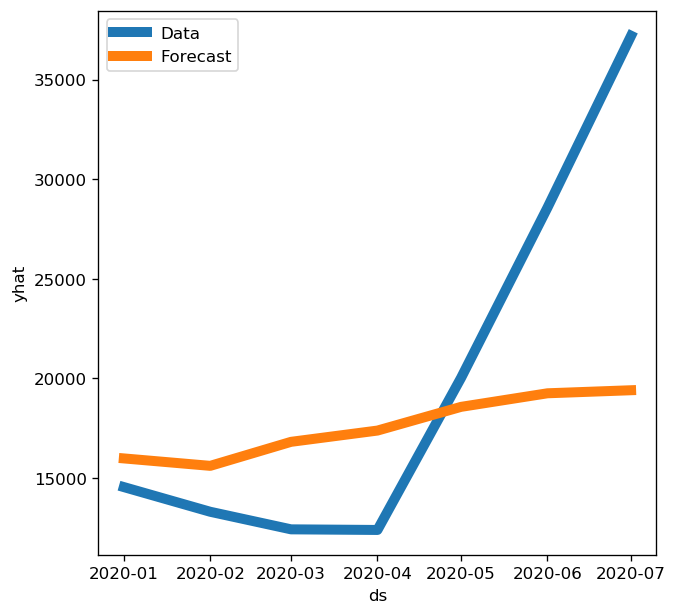

In [63]:
plt.figure(figsize = (6,6))
sns.lineplot('ds', 'y', data = Final_boro[120:], label = 'Data', linewidth = 6)
sns.lineplot('ds', 'yhat', data = Final_boro[120:] ,label ='Forecast', linewidth = 6)

In [64]:
Final_boro['change'] = (Final_boro['y']-Final_boro['yhat'])/Final_boro['yhat']

In [65]:
Final_boro

,ds,y,yhat,change
0,2010-01-01,12925,10282.615485,0.256976
1,2010-02-01,13461,10121.946883,0.329882
2,2010-03-01,13650,11315.764658,0.206282
3,2010-04-01,13933,12132.848394,0.148370
4,2010-05-01,13191,13219.850582,-0.002182
...,...,...,...,...
122,2020-03-01,12426,16817.638332,-0.261133
123,2020-04-01,12395,17382.815906,-0.286939
124,2020-05-01,20029,18572.790407,0.078406
125,2020-06-01,28572,19253.635815,0.483979


In [66]:
Final_boro.to_excel(r'Final_boro.xlsx', index = False)

# Downtown

In [67]:
DT = df_downtown.rename(columns={"date": "ds", "amount": "y"})
DT2= DT[['ds','y']]
DT2['ds'] = DT2['ds'].astype('datetime64')
DT3 = DT2[:120]


C:\Users\doube\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
DT_m = Prophet()
DT_m.fit(DT3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
DT_future = m.make_future_dataframe(periods=7, freq='MS')
DT_future.tail()

,ds
122,2020-03-01
123,2020-04-01
124,2020-05-01
125,2020-06-01
126,2020-07-01


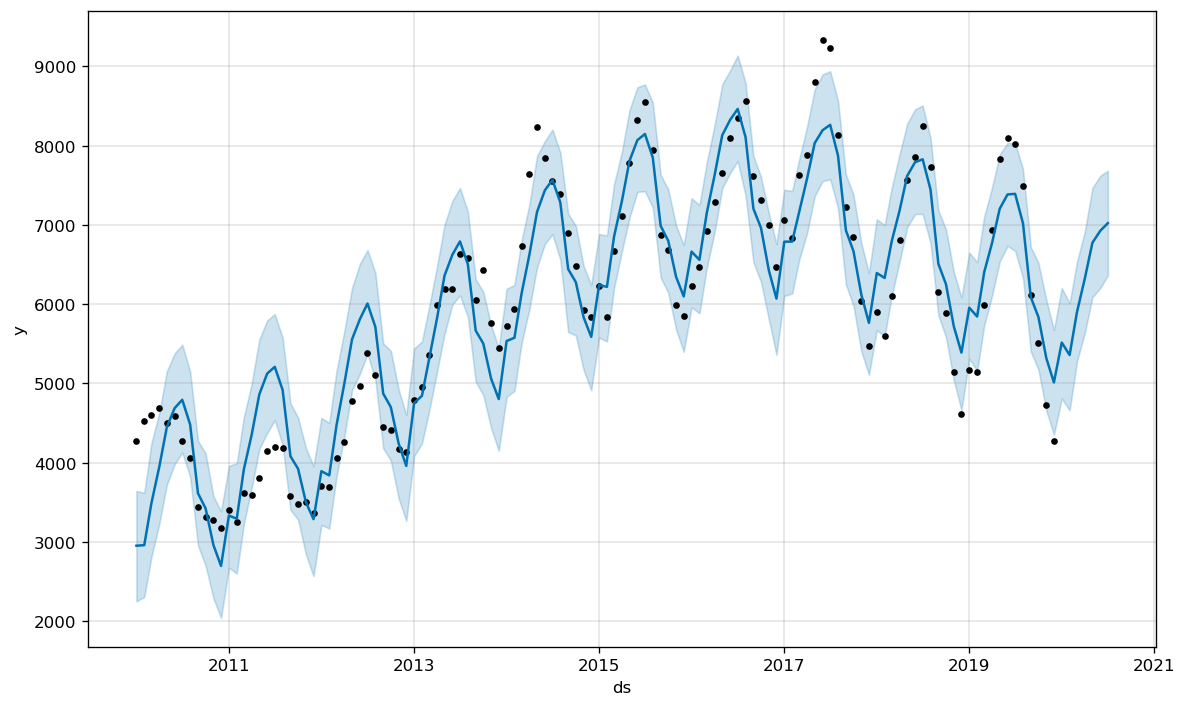

In [70]:
DT_forecast = DT_m.predict(DT_future)
DT_fig1 = DT_m.plot(DT_forecast)

In [71]:
Final_DT = pd.merge(DT2, DT_forecast, on='ds', how='inner')

In [72]:
Final_DT = Final_DT.drop(['trend', 'yhat_lower','yhat_upper','trend_lower','trend_upper','additive_terms','additive_terms_lower','additive_terms_upper', 'yearly','yearly_lower','multiplicative_terms','yearly_upper','multiplicative_terms_lower','multiplicative_terms_upper'], axis=1)

In [73]:
Final_DT

,ds,y,yhat
0,2010-01-01,4268,2952.900046
1,2010-02-01,4531,2959.920117
2,2010-03-01,4599,3485.887535
3,2010-04-01,4694,3943.776478
4,2010-05-01,4504,4448.240773
...,...,...,...
122,2020-03-01,4198,5899.727096
123,2020-04-01,4458,6324.143111
124,2020-05-01,7857,6775.779199
125,2020-06-01,11250,6925.856384


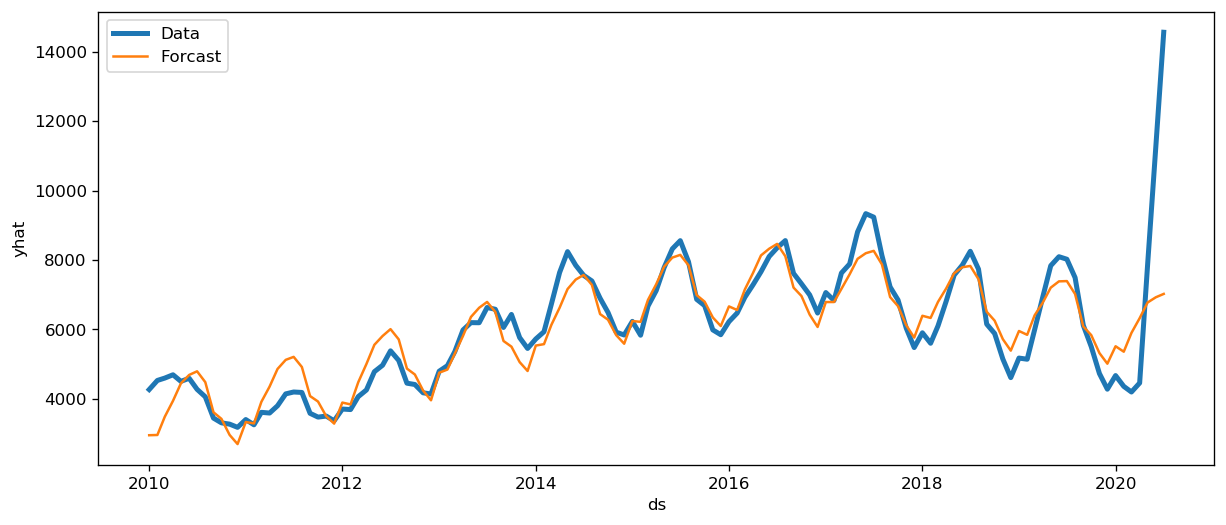

In [74]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_DT, label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_DT ,label ='Forcast')

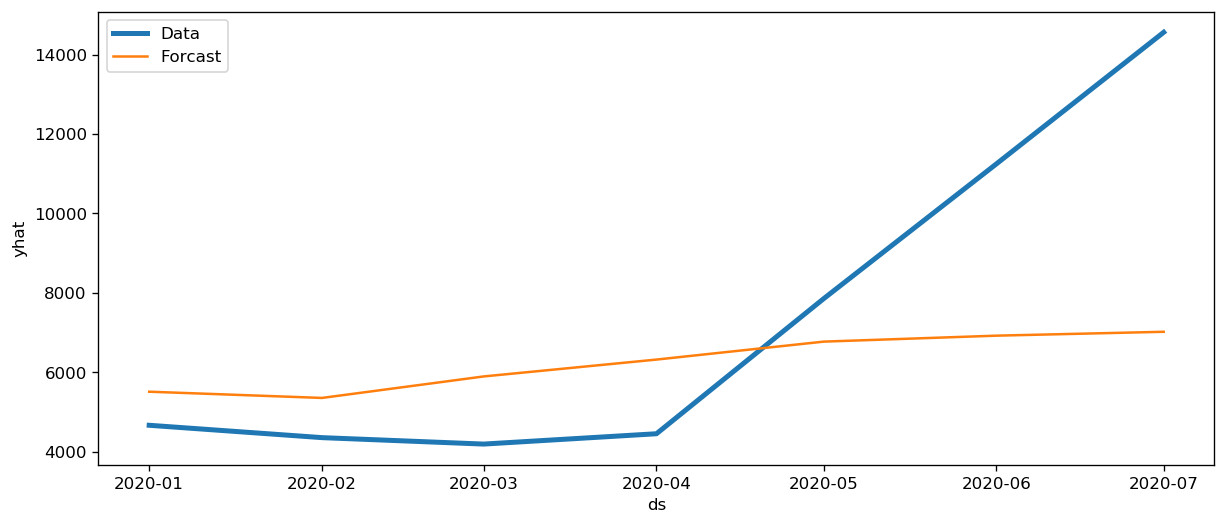

In [75]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_DT[120:], label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_DT[120:] ,label ='Forcast')

In [76]:
Final_DT['change'] = (Final_DT['y']-Final_DT['yhat'])/Final_DT['yhat']

In [77]:
Final_DT

,ds,y,yhat,change
0,2010-01-01,4268,2952.900046,0.445359
1,2010-02-01,4531,2959.920117,0.530785
2,2010-03-01,4599,3485.887535,0.319320
3,2010-04-01,4694,3943.776478,0.190230
4,2010-05-01,4504,4448.240773,0.012535
...,...,...,...,...
122,2020-03-01,4198,5899.727096,-0.288442
123,2020-04-01,4458,6324.143111,-0.295082
124,2020-05-01,7857,6775.779199,0.159571
125,2020-06-01,11250,6925.856384,0.624348


# Uptown

In [78]:
UT = df_upper.rename(columns={"date": "ds", "amount": "y"})
UT2= UT[['ds','y']]
UT2['ds'] = UT2['ds'].astype('datetime64')
UT3 = UT2[:120]

C:\Users\doube\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
UT_m = Prophet()
UT_m.fit(UT3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
UT_future = m.make_future_dataframe(periods=7, freq='MS')
UT_future.tail()

,ds
122,2020-03-01
123,2020-04-01
124,2020-05-01
125,2020-06-01
126,2020-07-01


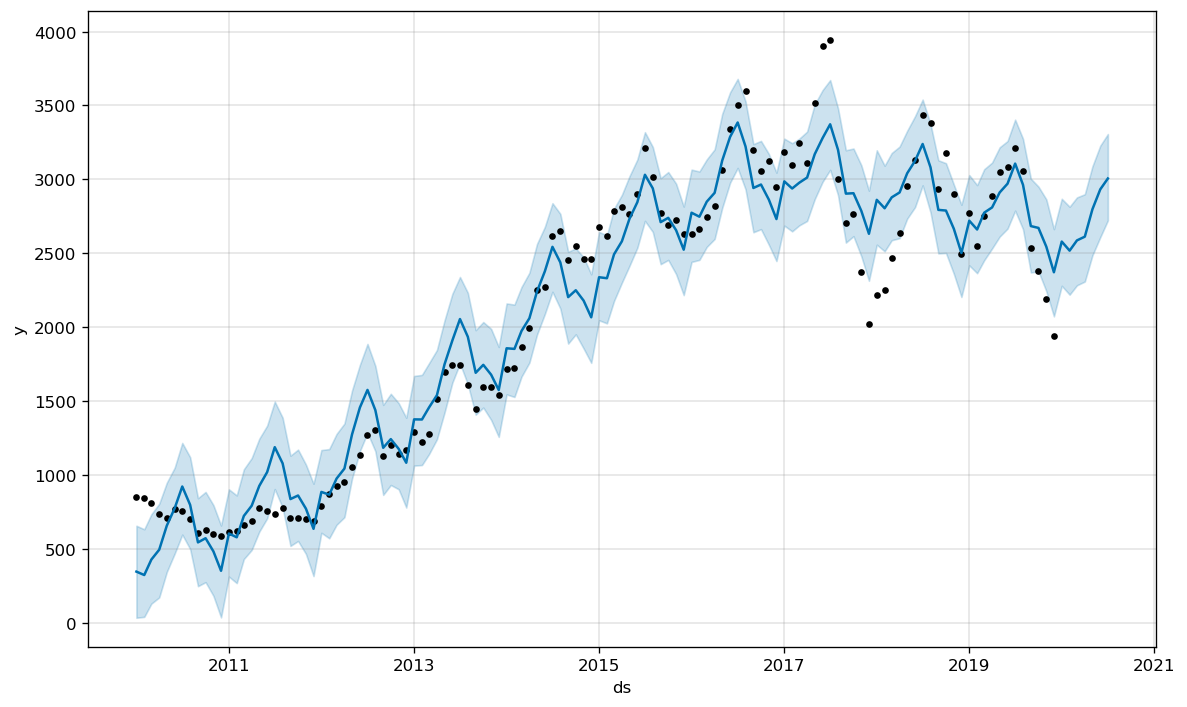

In [81]:
UT_forecast = UT_m.predict(UT_future)
UT_fig1 = UT_m.plot(UT_forecast)

In [82]:
Final_UT = pd.merge(UT2, UT_forecast, on='ds', how='inner')

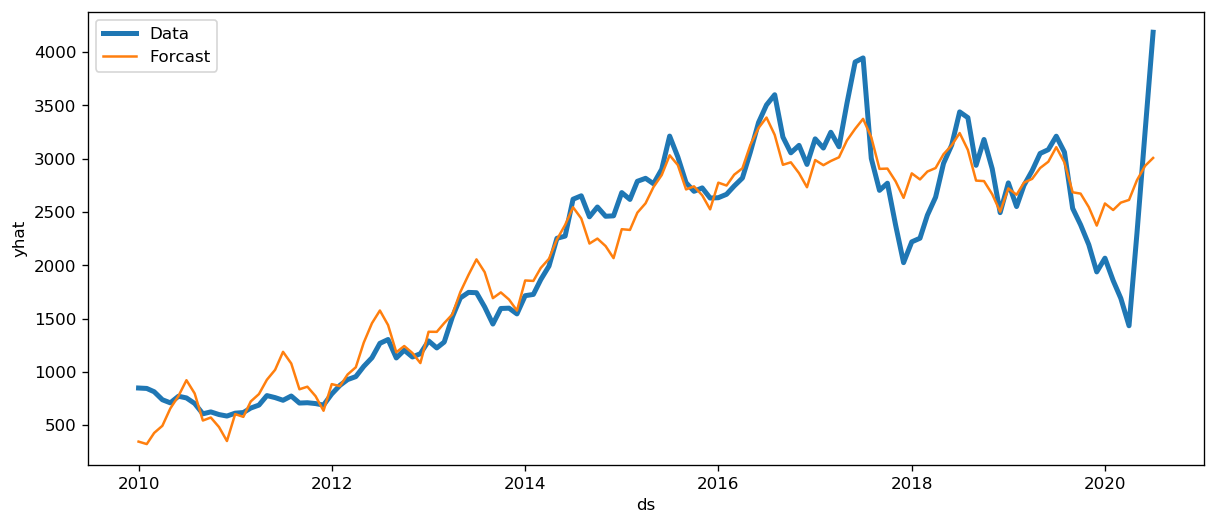

In [83]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_UT, label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_UT ,label ='Forcast')

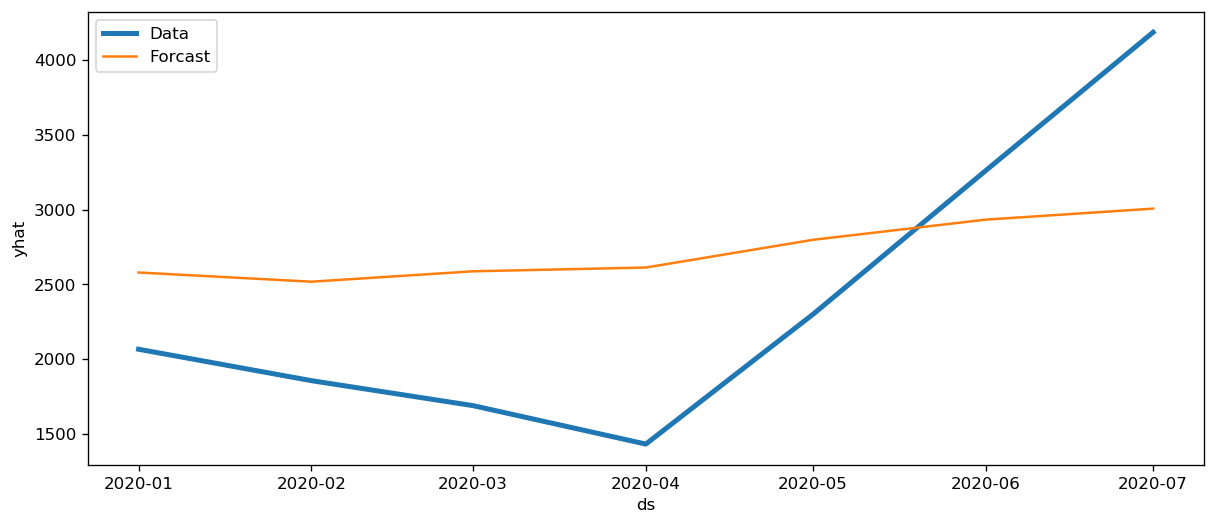

In [84]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_UT[120:], label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_UT[120:] ,label ='Forcast')

In [85]:
Final_UT['change'] = (Final_UT['y']-Final_UT['yhat'])/Final_UT['yhat']

In [86]:
Final_UT = Final_UT.drop(['trend', 'yhat_lower','yhat_upper','trend_lower','trend_upper','additive_terms','additive_terms_lower','additive_terms_upper', 'yearly','yearly_lower','multiplicative_terms','yearly_upper','multiplicative_terms_lower','multiplicative_terms_upper'], axis=1)

In [87]:
Final_UT

,ds,y,yhat,change
0,2010-01-01,848,345.235207,1.456296
1,2010-02-01,844,322.158295,1.619830
2,2010-03-01,813,426.768567,0.905014
3,2010-04-01,738,493.570341,0.495228
4,2010-05-01,709,656.291159,0.080313
...,...,...,...,...
122,2020-03-01,1689,2586.960036,-0.347110
123,2020-04-01,1432,2612.209376,-0.451805
124,2020-05-01,2300,2797.568830,-0.177858
125,2020-06-01,3261,2932.526384,0.112010


# MIDTOWN

In [88]:
MT = df_midtown.rename(columns={"date": "ds", "amount": "y"})
MT2= MT[['ds','y']]
MT2['ds'] = MT2['ds'].astype('datetime64')
MT3 = MT2[:120]

C:\Users\doube\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
MT_m = Prophet()
MT_m.fit(MT3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
MT_future = m.make_future_dataframe(periods=7, freq='MS')
MT_future.tail()

,ds
122,2020-03-01
123,2020-04-01
124,2020-05-01
125,2020-06-01
126,2020-07-01


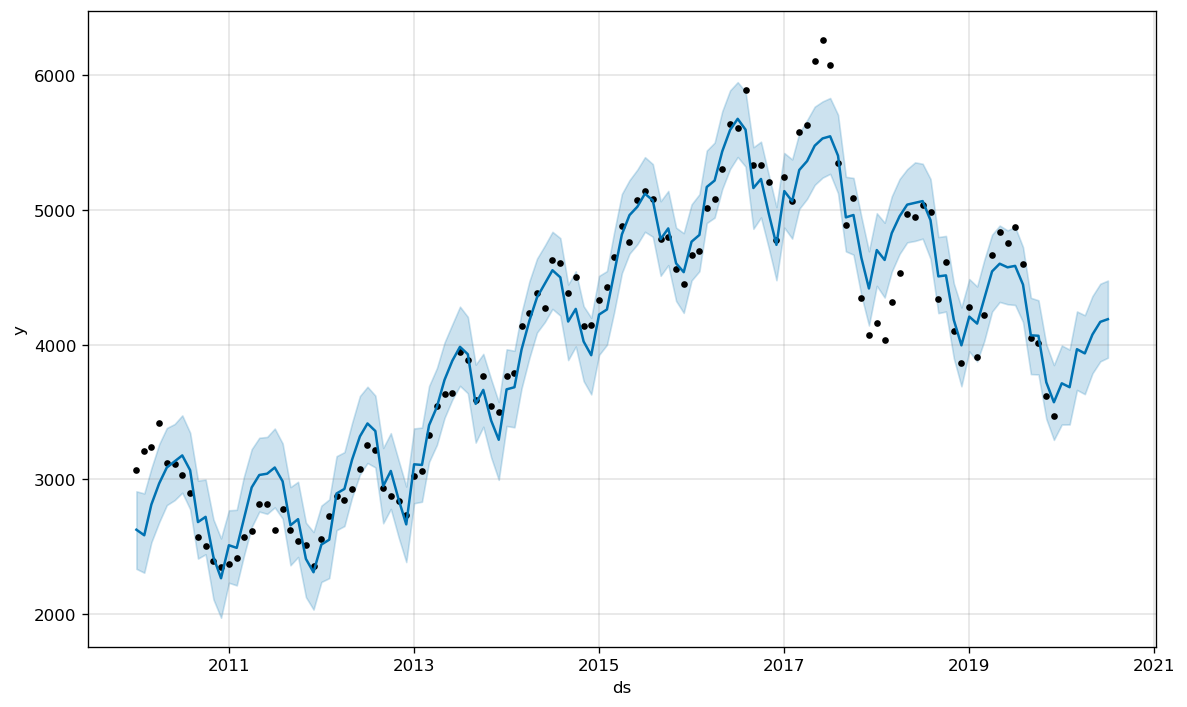

In [91]:
MT_forecast = MT_m.predict(MT_future)
MT_fig1 = MT_m.plot(MT_forecast)

In [92]:
Final_MT = pd.merge(MT2, MT_forecast, on='ds', how='inner')

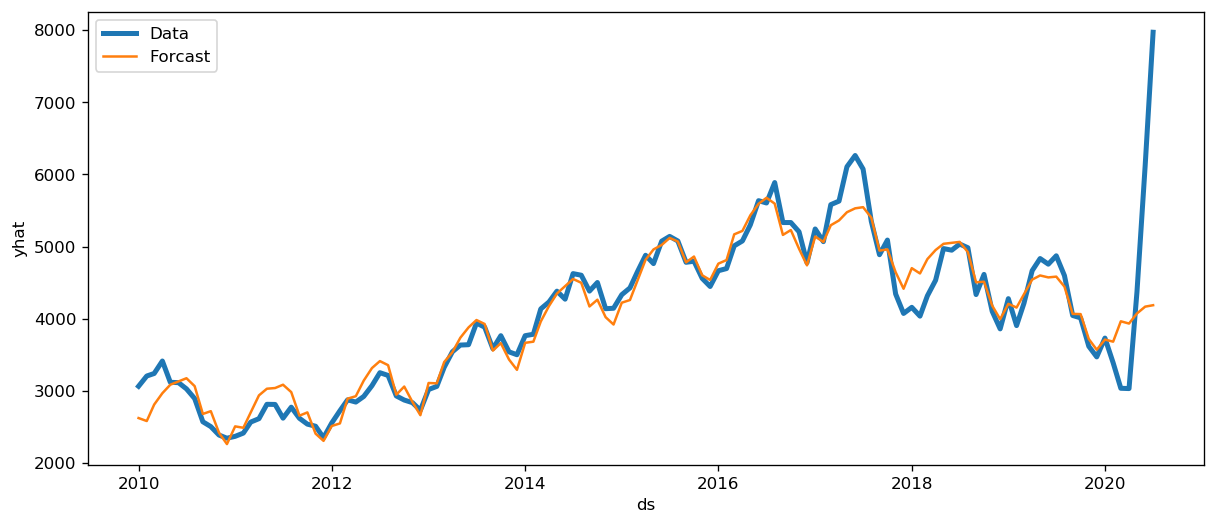

In [93]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_MT, label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_MT ,label ='Forcast')

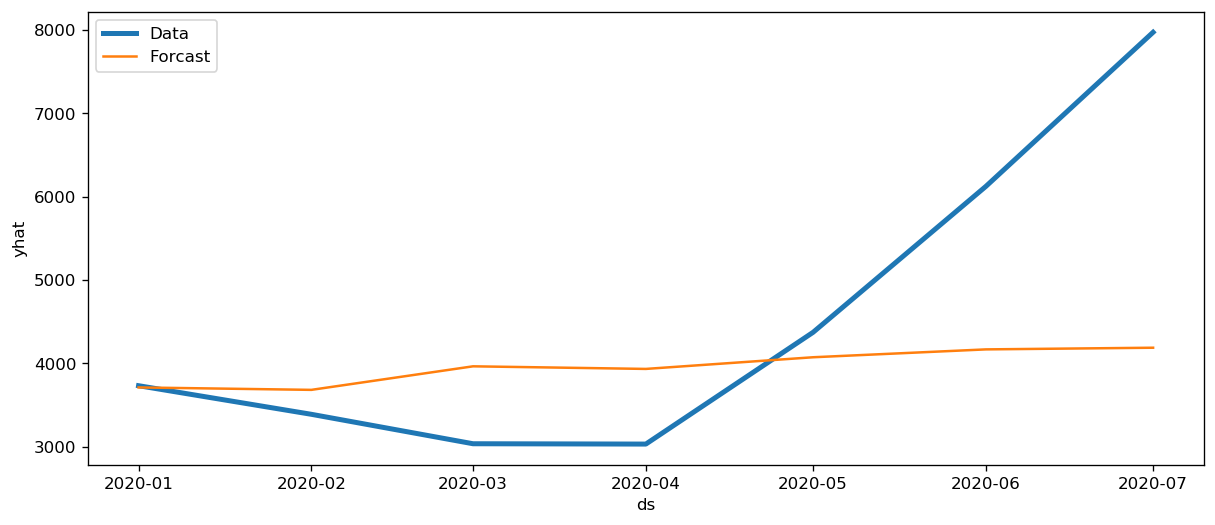

In [94]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_MT[120:], label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_MT[120:] ,label ='Forcast')

In [95]:
Final_MT['change'] = (Final_MT['y']-Final_MT['yhat'])/Final_MT['yhat']

In [96]:
Final_MT = Final_MT.drop(['trend', 'yhat_lower','yhat_upper','trend_lower','trend_upper','additive_terms','additive_terms_lower','additive_terms_upper', 'yearly','yearly_lower','multiplicative_terms','yearly_upper','multiplicative_terms_lower','multiplicative_terms_upper'], axis=1)

In [97]:
Final_MT

,ds,y,yhat,change
0,2010-01-01,3065,2624.425044,0.167875
1,2010-02-01,3207,2583.229344,0.241469
2,2010-03-01,3242,2811.367909,0.153175
3,2010-04-01,3415,2968.965484,0.150232
4,2010-05-01,3120,3086.521336,0.010847
...,...,...,...,...
122,2020-03-01,3037,3965.343424,-0.234114
123,2020-04-01,3033,3934.140317,-0.229056
124,2020-05-01,4373,4074.024029,0.073386
125,2020-06-01,6123,4168.369009,0.468920


# Eastside

In [98]:
ES = df_east_side.rename(columns={"date": "ds", "amount": "y"})
ES2= ES[['ds','y']]
ES2['ds'] = ES2['ds'].astype('datetime64')
ES3 = ES2[:120]

C:\Users\doube\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
ES_m = Prophet()
ES_m.fit(ES3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
ES_future = m.make_future_dataframe(periods=7, freq='MS')
ES_future.tail()

,ds
122,2020-03-01
123,2020-04-01
124,2020-05-01
125,2020-06-01
126,2020-07-01


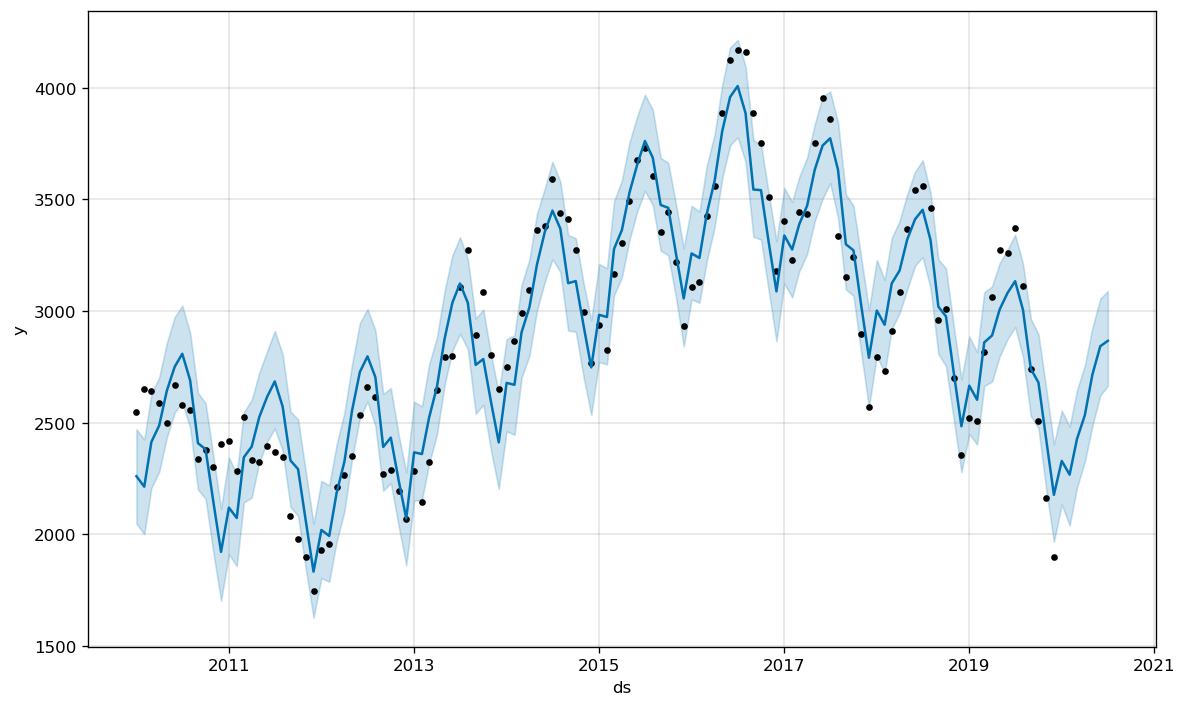

In [101]:
ES_forecast = ES_m.predict(ES_future)
ES_fig1 = ES_m.plot(ES_forecast)

In [102]:
Final_ES = pd.merge(ES2, ES_forecast, on='ds', how='inner')

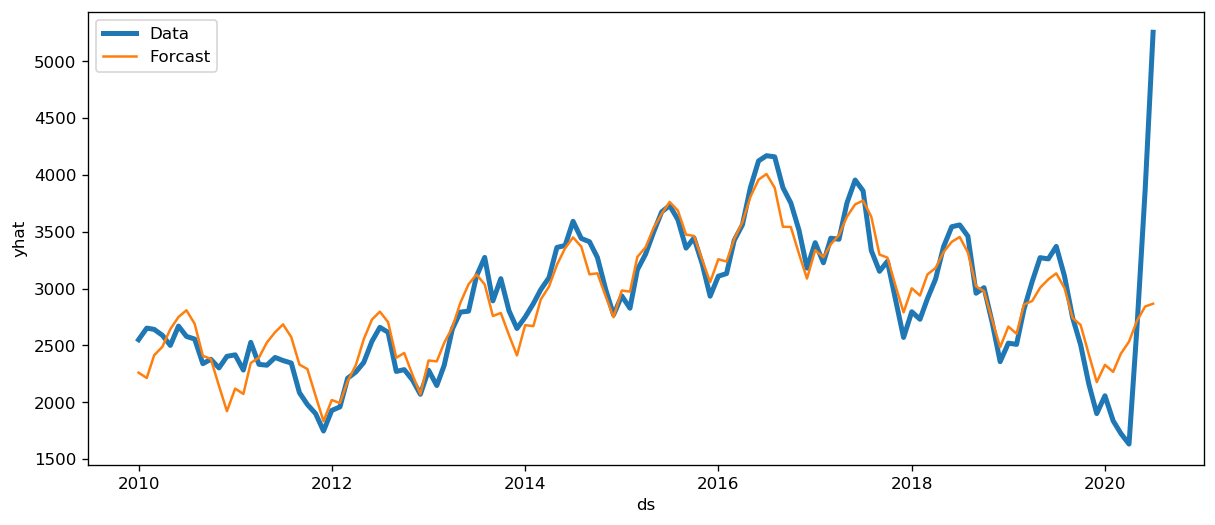

In [103]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_ES, label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_ES ,label ='Forcast')

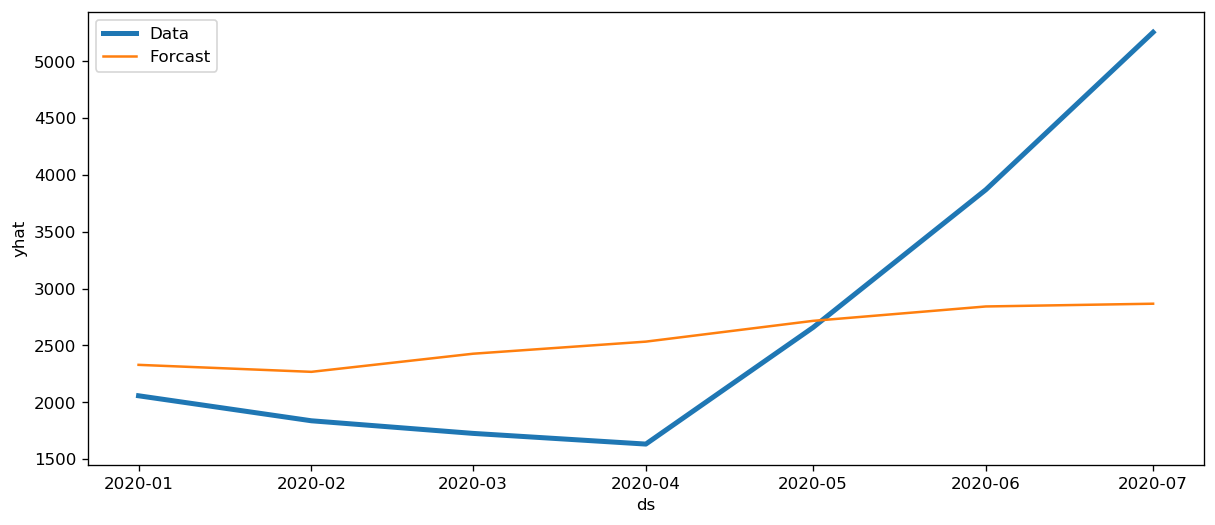

In [104]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_ES[120:], label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_ES[120:] ,label ='Forcast')

In [105]:
Final_ES['change'] = (Final_ES['y']-Final_ES['yhat'])/Final_ES['yhat']

In [106]:
Final_ES = Final_ES.drop(['trend', 'yhat_lower','yhat_upper','trend_lower','trend_upper','additive_terms','additive_terms_lower','additive_terms_upper', 'yearly','yearly_lower','multiplicative_terms','yearly_upper','multiplicative_terms_lower','multiplicative_terms_upper'], axis=1)

In [107]:
Final_ES

,ds,y,yhat,change
0,2010-01-01,2550,2260.399414,0.128119
1,2010-02-01,2652,2213.411311,0.198151
2,2010-03-01,2641,2413.676428,0.094181
3,2010-04-01,2589,2487.821571,0.040669
4,2010-05-01,2500,2642.849242,-0.054051
...,...,...,...,...
122,2020-03-01,1726,2426.849942,-0.288790
123,2020-04-01,1632,2533.273196,-0.355774
124,2020-05-01,2658,2716.025453,-0.021364
125,2020-06-01,3870,2842.676977,0.361393


# WESTSIDE

In [108]:
WS = df_west_side.rename(columns={"date": "ds", "amount": "y"})
WS2= WS[['ds','y']]
WS2['ds'] = WS2['ds'].astype('datetime64')
WS3 = WS2[:120]

C:\Users\doube\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
WS_m = Prophet()
WS_m.fit(WS3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [110]:
WS_future = m.make_future_dataframe(periods=7, freq='MS')
WS_future.tail()

,ds
122,2020-03-01
123,2020-04-01
124,2020-05-01
125,2020-06-01
126,2020-07-01


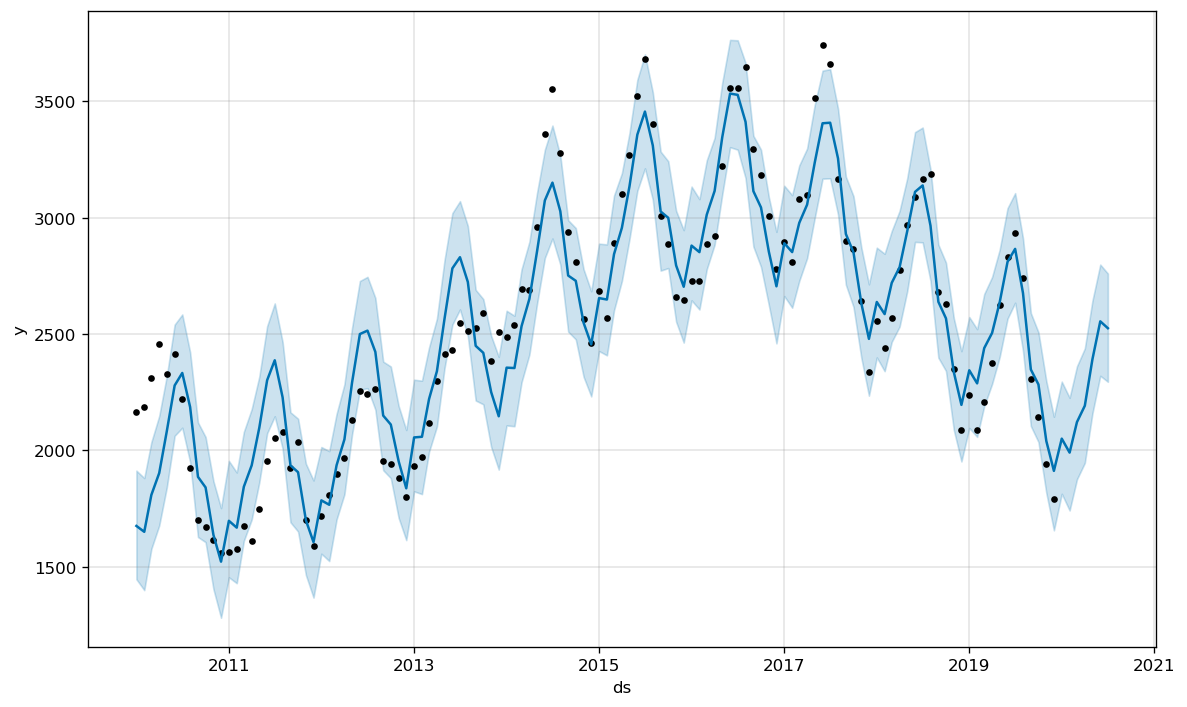

In [111]:
WS_forecast = WS_m.predict(WS_future)
WS_fig1 = WS_m.plot(WS_forecast)

In [112]:
Final_WS = pd.merge(WS2, WS_forecast, on='ds', how='inner')

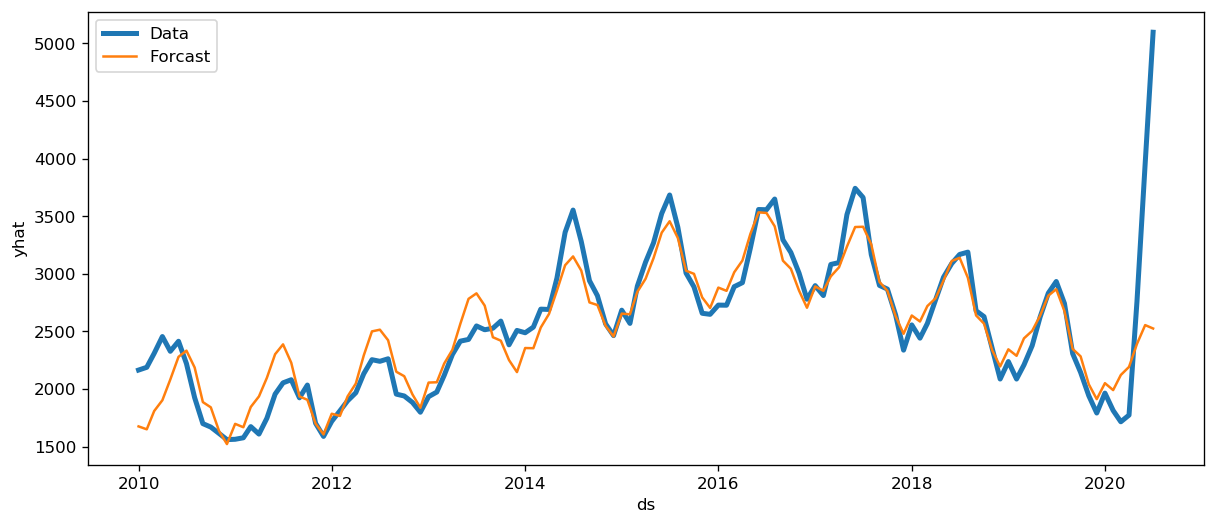

In [113]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_WS, label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_WS ,label ='Forcast')

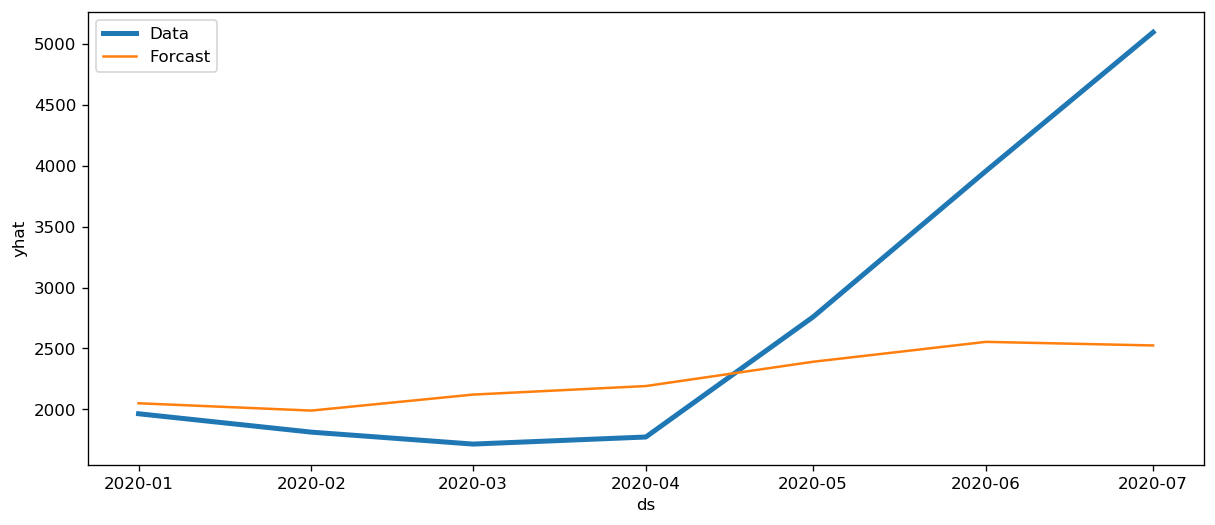

In [114]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_WS[120:], label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_WS[120:] ,label ='Forcast')

In [115]:
Final_WS['change'] = (Final_WS['y']-Final_WS['yhat'])/Final_WS['yhat']

In [116]:
Final_WS

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,change
0,2010-01-01,2164,1879.296816,1445.740822,1912.599128,1879.296816,1879.296816,-204.424760,-204.424760,-204.424760,-204.424760,-204.424760,-204.424760,0.0,0.0,0.0,1674.872056,0.292039
1,2010-02-01,2188,1881.492071,1398.851698,1880.768370,1881.492071,1881.492071,-231.888532,-231.888532,-231.888532,-231.888532,-231.888532,-231.888532,0.0,0.0,0.0,1649.603539,0.326379
2,2010-03-01,2309,1883.474881,1576.476857,2034.956549,1883.474881,1883.474881,-75.378649,-75.378649,-75.378649,-75.378649,-75.378649,-75.378649,0.0,0.0,0.0,1808.096232,0.277034
3,2010-04-01,2455,1885.670136,1676.583448,2147.347383,1885.670136,1885.670136,16.445015,16.445015,16.445015,16.445015,16.445015,16.445015,0.0,0.0,0.0,1902.115150,0.290668
4,2010-05-01,2327,1887.794575,1840.934176,2319.590551,1887.794575,1887.794575,194.520890,194.520890,194.520890,194.520890,194.520890,194.520890,0.0,0.0,0.0,2082.315466,0.117506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020-03-01,1715,2214.905484,1875.437412,2361.046970,2210.932388,2218.619065,-93.499719,-93.499719,-93.499719,-93.499719,-93.499719,-93.499719,0.0,0.0,0.0,2121.405765,-0.191574
123,2020-04-01,1773,2190.295100,1946.032882,2438.042880,2182.479452,2197.309526,1.273031,1.273031,1.273031,1.273031,1.273031,1.273031,0.0,0.0,0.0,2191.568131,-0.190990
124,2020-05-01,2759,2166.478598,2158.609886,2642.708823,2155.479174,2176.883619,224.492613,224.492613,224.492613,224.492613,224.492613,224.492613,0.0,0.0,0.0,2390.971211,0.153924
125,2020-06-01,3957,2141.868213,2320.314521,2798.325222,2126.627368,2157.060254,412.584134,412.584134,412.584134,412.584134,412.584134,412.584134,0.0,0.0,0.0,2554.452347,0.549060


In [117]:
Final_WS = Final_WS.drop(['trend', 'yhat_lower','yhat_upper','trend_lower','trend_upper','additive_terms','additive_terms_lower','additive_terms_upper', 'yearly','yearly_lower','multiplicative_terms','yearly_upper','multiplicative_terms_lower','multiplicative_terms_upper'], axis=1)

# Change 

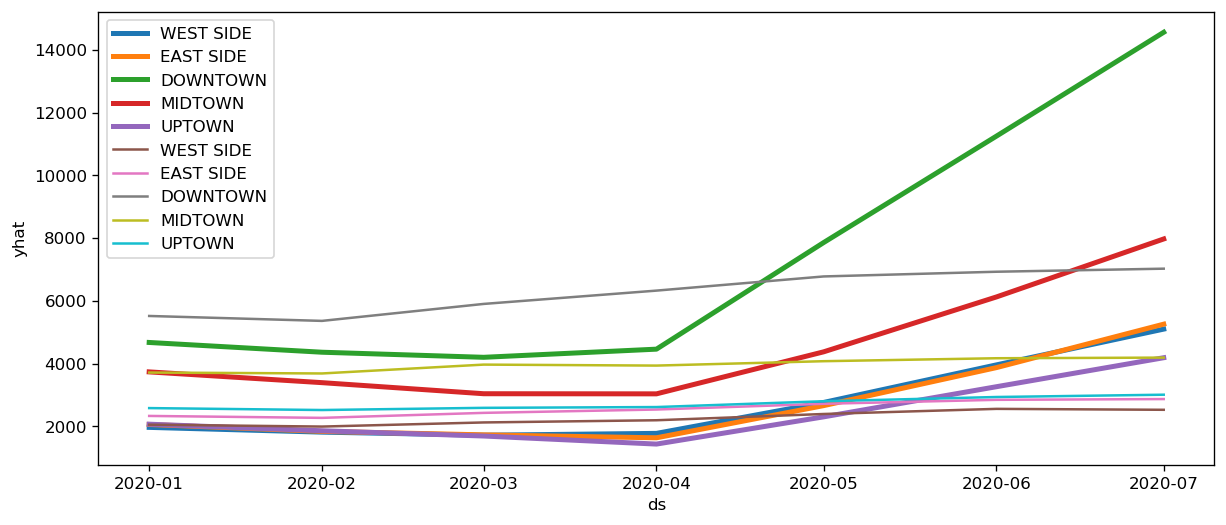

In [118]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_WS[120:], label = 'WEST SIDE', linewidth = 3)
sns.lineplot('ds', 'y', data = Final_ES[120:] ,label ='EAST SIDE', linewidth = 3)
sns.lineplot('ds', 'y', data = Final_DT[120:] ,label ='DOWNTOWN', linewidth = 3)
sns.lineplot('ds', 'y', data = Final_MT[120:] ,label ='MIDTOWN', linewidth = 3)
sns.lineplot('ds', 'y', data = Final_UT[120:] ,label ='UPTOWN', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_WS[120:], label = 'WEST SIDE')
sns.lineplot('ds', 'yhat', data = Final_ES[120:] ,label ='EAST SIDE')
sns.lineplot('ds', 'yhat', data = Final_DT[120:] ,label ='DOWNTOWN')
sns.lineplot('ds', 'yhat', data = Final_MT[120:] ,label ='MIDTOWN')
sns.lineplot('ds', 'yhat', data = Final_UT[120:] ,label ='UPTOWN')


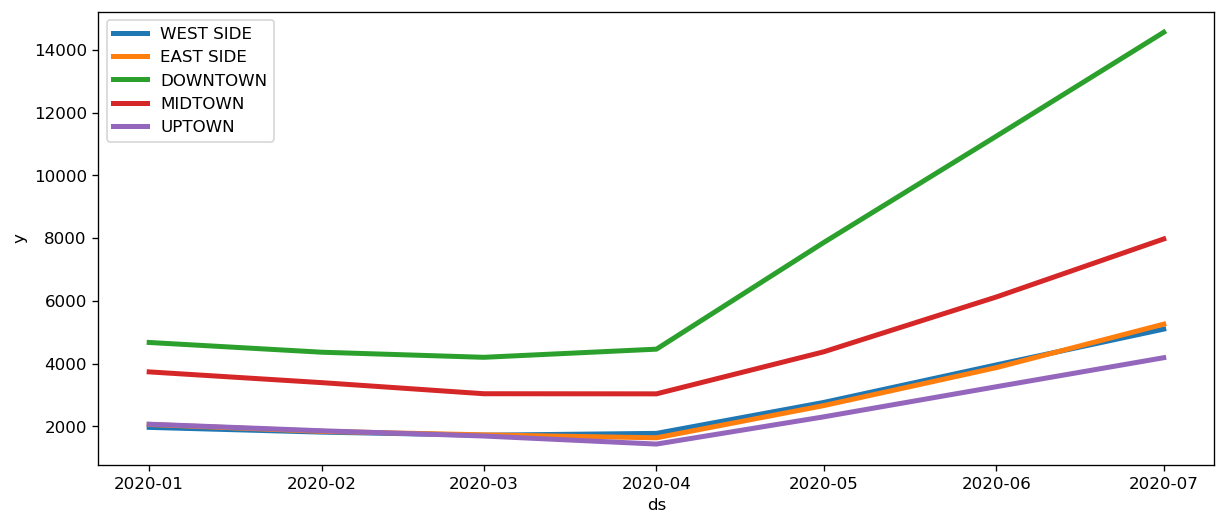

In [119]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_WS[120:], label = 'WEST SIDE', linewidth = 3)
sns.lineplot('ds', 'y', data = Final_ES[120:] ,label ='EAST SIDE', linewidth = 3)
sns.lineplot('ds', 'y', data = Final_DT[120:] ,label ='DOWNTOWN', linewidth = 3)
sns.lineplot('ds', 'y', data = Final_MT[120:] ,label ='MIDTOWN', linewidth = 3)
sns.lineplot('ds', 'y', data = Final_UT[120:] ,label ='UPTOWN', linewidth = 3)

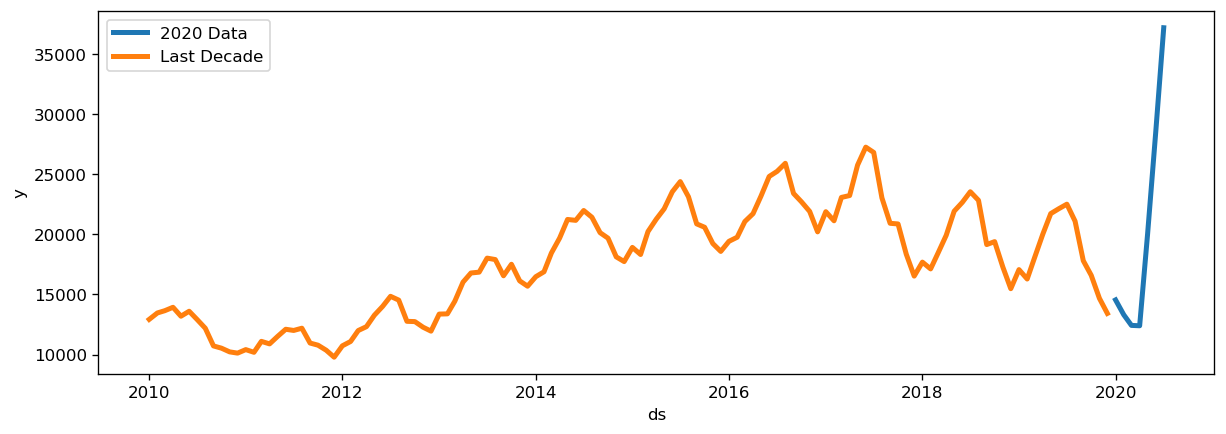

In [120]:
plt.figure(figsize = (12,4))
sns.lineplot('ds', 'y', data = Final_boro[120:], label = '2020 Data', linewidth =3 )
sns.lineplot('ds', 'y', data = Final_boro[:120] ,label ='Last Decade', linewidth = 3)

In [121]:
df ={'Final_WS','Final_ES','Final_MT','Final_DT','Final_UT'}

In [122]:
df

{'Final_DT', 'Final_ES', 'Final_MT', 'Final_UT', 'Final_WS'}

In [123]:
df = pd.concat([Final_WS,Final_ES,Final_MT,Final_DT,Final_UT])

In [124]:
df

,ds,y,yhat,change
0,2010-01-01,2164,1674.872056,0.292039
1,2010-02-01,2188,1649.603539,0.326379
2,2010-03-01,2309,1808.096232,0.277034
3,2010-04-01,2455,1902.115150,0.290668
4,2010-05-01,2327,2082.315466,0.117506
...,...,...,...,...
122,2020-03-01,1689,2586.960036,-0.347110
123,2020-04-01,1432,2612.209376,-0.451805
124,2020-05-01,2300,2797.568830,-0.177858
125,2020-06-01,3261,2932.526384,0.112010


In [140]:
Final_WS,Final_ES,Final_MT,Final_DT,Final_UT

(            ds     y         yhat    change  Submarket
 0   2010-01-01  2164  1674.872056  0.292039  West Side
 1   2010-02-01  2188  1649.603539  0.326379  West Side
 2   2010-03-01  2309  1808.096232  0.277034  West Side
 3   2010-04-01  2455  1902.115150  0.290668  West Side
 4   2010-05-01  2327  2082.315466  0.117506  West Side
 ..         ...   ...          ...       ...        ...
 122 2020-03-01  1715  2121.405765 -0.191574  West Side
 123 2020-04-01  1773  2191.568131 -0.190990  West Side
 124 2020-05-01  2759  2390.971211  0.153924  West Side
 125 2020-06-01  3957  2554.452347  0.549060  West Side
 126 2020-07-01  5097  2524.878959  1.018711  West Side
 
 [127 rows x 5 columns],
             ds     y         yhat    change  Submarket
 0   2010-01-01  2550  2260.399414  0.128119  East Side
 1   2010-02-01  2652  2213.411311  0.198151  East Side
 2   2010-03-01  2641  2413.676428  0.094181  East Side
 3   2010-04-01  2589  2487.821571  0.040669  East Side
 4   2010-05-01  2500

In [126]:
Final_WS['Submarket'] = 'West Side'

In [127]:
Final_WS

,ds,y,yhat,change,Submarket
0,2010-01-01,2164,1674.872056,0.292039,West Side
1,2010-02-01,2188,1649.603539,0.326379,West Side
2,2010-03-01,2309,1808.096232,0.277034,West Side
3,2010-04-01,2455,1902.115150,0.290668,West Side
4,2010-05-01,2327,2082.315466,0.117506,West Side
...,...,...,...,...,...
122,2020-03-01,1715,2121.405765,-0.191574,West Side
123,2020-04-01,1773,2191.568131,-0.190990,West Side
124,2020-05-01,2759,2390.971211,0.153924,West Side
125,2020-06-01,3957,2554.452347,0.549060,West Side


In [128]:
Final_ES['Submarket'] = 'East Side'
Final_MT['Submarket'] = 'Midtown'
Final_DT['Submarket'] = 'Downtown'
Final_UT['Submarket'] = 'Uptown'

In [129]:
df.to_excel(r'Submarkets.xlsx', index = False)

# Forecasting 2020 Rent Prices

In [130]:
rent = pd.read_csv('rentalIndex_All.csv')

In [131]:
rent2 = rent.drop(['Brooklyn', 'Queens'], axis=1)

In [132]:
rent3 = rent2.rename(columns={"Month": "ds", "Manhattan": "y"})
rent4= rent3[['ds','y']]
rent3['ds'] = rent3['ds'].astype('datetime64')
rent4 = rent3[:156]

In [133]:
rent_m = Prophet()
rent_m.fit(rent4)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [134]:
rent_future = rent_m.make_future_dataframe(periods=7, freq='MS')
rent_future.tail()

,ds
158,2020-03-01
159,2020-04-01
160,2020-05-01
161,2020-06-01
162,2020-07-01


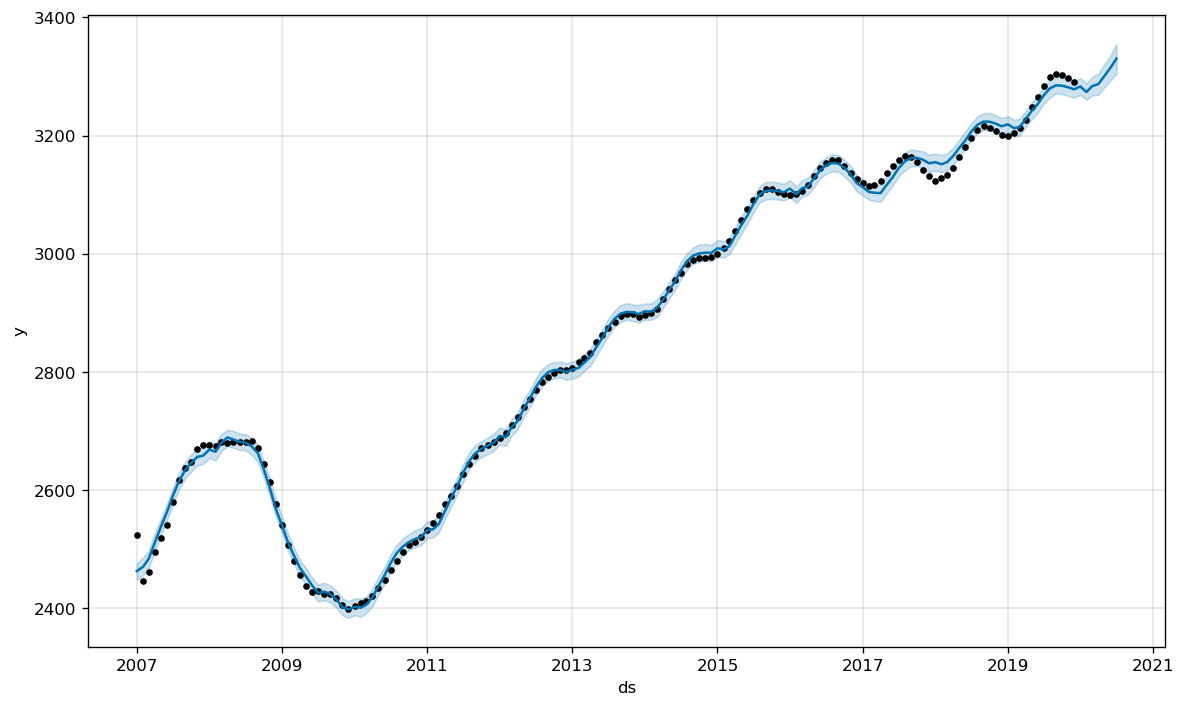

In [135]:
rent_forecast = rent_m.predict(rent_future)
rent_fig1 = rent_m.plot(rent_forecast)

In [136]:
Final_rent = pd.merge(rent3, rent_forecast, on='ds', how='inner')

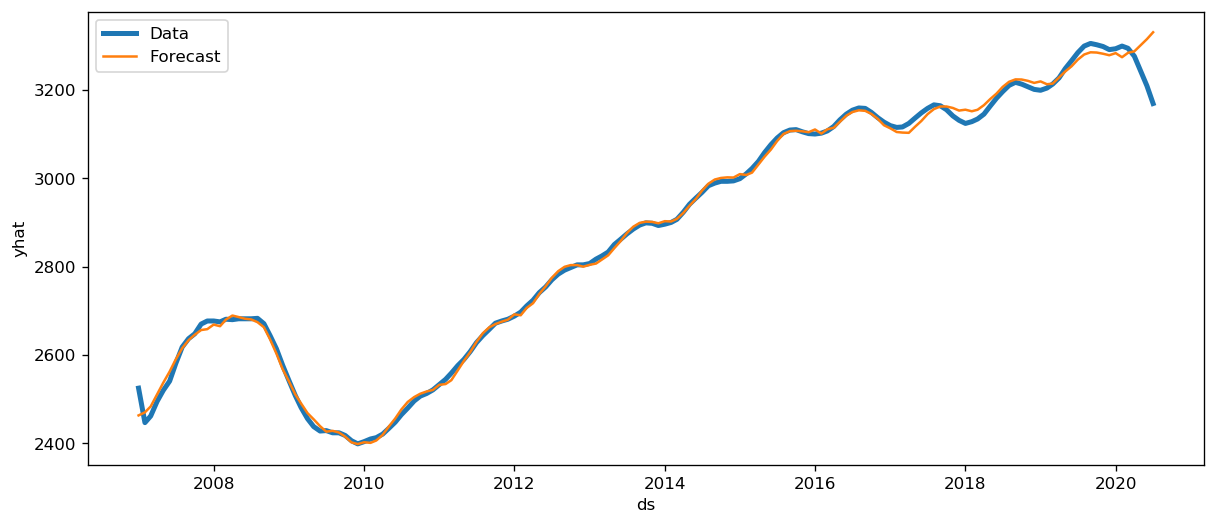

In [137]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_rent, label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_rent ,label ='Forecast')

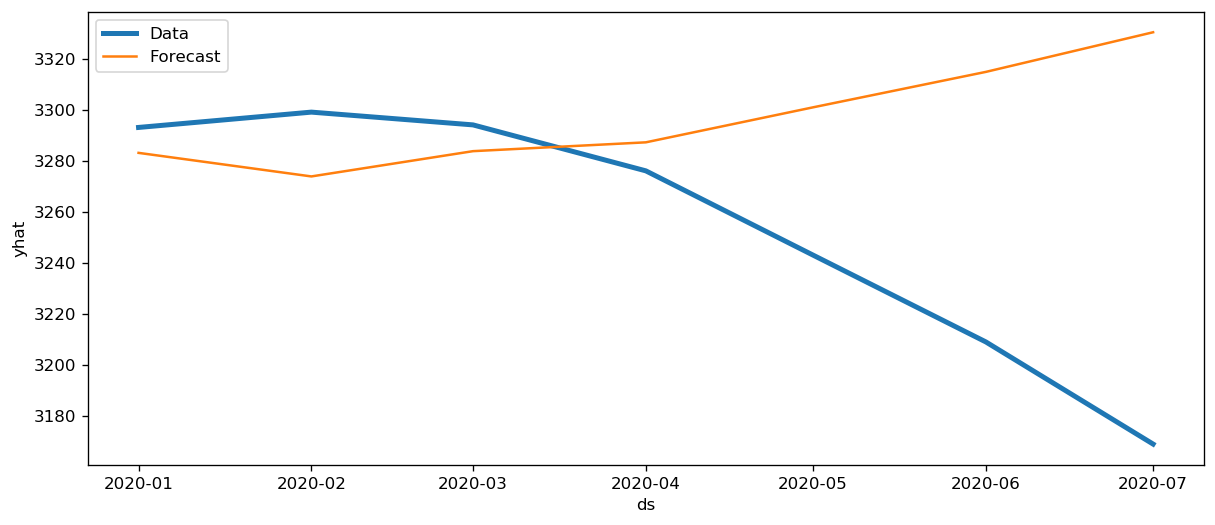

In [138]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_rent[156:], label = 'Data', linewidth = 3)
sns.lineplot('ds', 'yhat', data = Final_rent[156:] ,label ='Forecast')

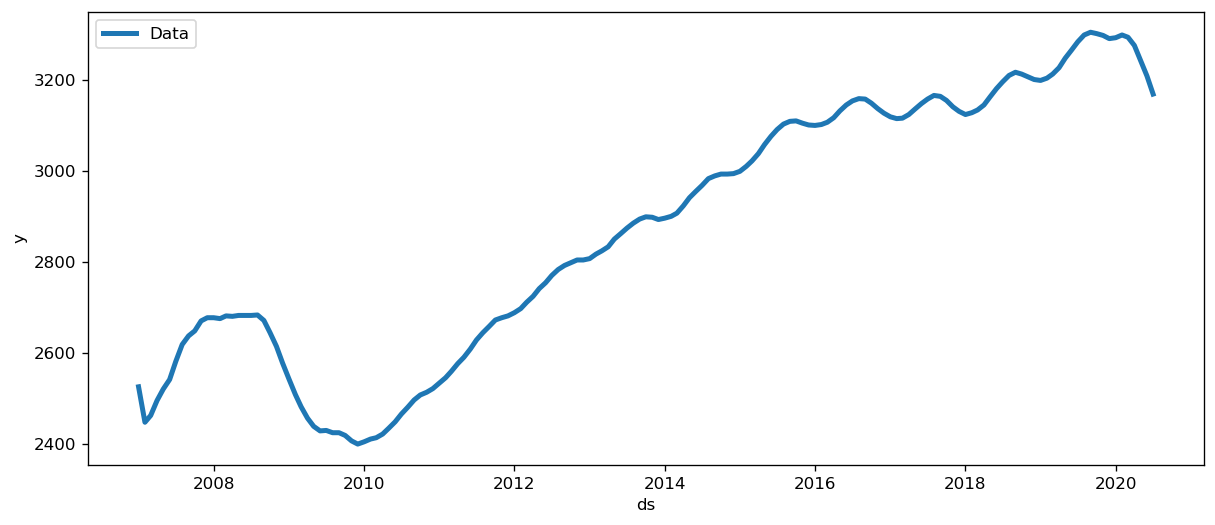

In [139]:
plt.figure(figsize = (12,5))
sns.lineplot('ds', 'y', data = Final_rent, label = 'Data', linewidth = 3)